In [81]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np

# Load dataset
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# Target encoding
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

# One-hot encode features
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)

# Stratified CV for fairness
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Class balance:", y.value_counts(normalize=True))
print("X shape:", X.shape)


Class balance: Resistance
1    0.5
0    0.5
Name: proportion, dtype: float64
X shape: (98, 197)


In [82]:
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)


In [83]:
from sklearn.model_selection import StratifiedKFold
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, random_state=42))
])


In [85]:
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # safe for sparse one-hot
    ('clf', SVC(probability=True, random_state=42))
])


In [87]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # safe for sparse one-hot
    ('clf', SVC(probability=True, random_state=42))
])


In [ ]:
print(y.value_counts(normalize=True))  # Class balance
for model in [svm_best, log_best, xgb_best]:
    print(np.unique(model.predict(X), return_counts=True))  # Predicting both classes?


Resistance
1    0.5
0    0.5
Name: proportion, dtype: float64


NameError: name 'svm_best' is not defined

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# Print the first few rows and the column names
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'NC_000962.3:3877464-3878507+287',
       'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36',
       'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132',
       'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606',
       'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696',
       'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857',
       'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289',
       'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304',
       'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333',
       'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335',
       'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471',
       'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479',
       'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189',
       'NC_000962.3:759807-763325+3225', 'NC_000962.3:

In [ ]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced', probability=True, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,     
    random_state=42
)


In [ ]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

print("\nFirst 5 rows of training data:")
print(X_train.head())

print("\nFirst 5 rows of testing data:")
print(X_test.head())

print("\nTraining labels distribution:")
print(y_train.value_counts())

print("\nTesting labels distribution:")
print(y_test.value_counts())


Training data shape: (78, 54)
Testing data shape: (20, 54)

First 5 rows of training data:
    Unnamed: 0 NC_000962.3:3877464-3878507+287  \
19          19                               T   
67          67                               T   
72          72                               T   
74          74                               T   
0            0                               T   

   NC_000962.3:3877464-3878507+689 NC_000962.3:759807-763325+36  \
19                               T                            T   
67                               T                            T   
72                               T                            T   
74                               T                            T   
0                                T                            T   

   NC_000962.3:759807-763325+97 NC_000962.3:759807-763325+132  \
19                            G                             T   
67                            G                             T   
72        

In [ ]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced', probability=True, random_state=42)
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


#  Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
# show categorical features (if needed)
X_encoded = pd.get_dummies(X)
# show target labels to numeric: 'S' -> 0, 'R' -> 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# we need to do Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


# Define the cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#load the random search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)



# Fit the model correctly
random_search.fit(X_encoded, y_encoded)
print("Best Parameters (XGB):", random_search.best_params_)
print("Best Score (XGB):", random_search.best_score_)
print("Best Estimator (XGB):", random_search.best_estimator_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (XGB): {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Best Score (XGB): 0.9589473684210527
Best Estimator (XGB): SVC(C=100, class_weight='balanced', gamma='auto', probability=True,
    random_state=42)


In [ ]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced', probability=True, random_state=42)
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


#  Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
# show categorical features (if needed)
X_encoded = pd.get_dummies(X)
# show target labels to numeric: 'S' -> 0, 'R' -> 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# we need to do Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


# Define the cross-validation 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#load the random search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)



# Fit the model correctly
random_search.fit(X_encoded, y_encoded)
print("Best Parameters (XGB):", random_search.best_params_)
print("Best Score (XGB):", random_search.best_score_)
print("Best Estimator (XGB):", random_search.best_estimator_)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (XGB): {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Best Score (XGB): 0.9800000000000001
Best Estimator (XGB): SVC(C=100, class_weight='balanced', gamma='auto', probability=True,
    random_state=42)


In [90]:
# --- SVM ---
svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, random_state=42))
])
svm_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}
svm_search = RandomizedSearchCV(svm_pipe, svm_params, n_iter=10, cv=cv10, n_jobs=-1, random_state=42)
svm_search.fit(X, y)
print("SVM best score:", svm_search.best_score_)

# --- Logistic Regression ---
log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])
log_params = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}
log_search = RandomizedSearchCV(log_pipe, log_params, n_iter=10, cv=cv10, n_jobs=-1, random_state=42)
log_search.fit(X, y)
print("Logistic best score:", log_search.best_score_)

# --- Random Forest ---
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=cv10, n_jobs=-1, random_state=42)
rf_search.fit(X, y)
print("Random Forest best score:", rf_search.best_score_)

# --- XGBoost ---
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=cv10, n_jobs=-1, random_state=42)
xgb_search.fit(X, y)
print("XGB best score:", xgb_search.best_score_)


SVM best score: 0.9088888888888889


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic best score: 0.9088888888888889
Random Forest best score: 0.928888888888889


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:21:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:21:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:21:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:21:25] WARN

XGB best score: 0.9788888888888889


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:21:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [91]:
from sklearn.metrics import classification_report, roc_auc_score

# Hold-out test set check
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

best_model = xgb_search.best_estimator_  # replace with model you want to test
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:21:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC-AUC: 1.0


## End of XG-Boost and SVM 

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)


In [ ]:
import pandas as pd
import numpy as np


X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance'].map({'S': 0, 'R': 1})  


X_encoded = pd.get_dummies(X).fillna(0).astype(float)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

# Train/test split (so we tune only on training data)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)


log_reg = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',   # supports L1/L2 for binary
    max_iter=1000,
    random_state=42
)


param_grid = {
    'C': [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
    'penalty': ['l1', 'l2']   
}

# 10-fold cross 
cv_tune = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=20,                 # try up to 20 combos
    scoring='accuracy',        # use 'roc_auc' if you prefer
    cv=cv_tune,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best Params (LogReg):", random_search.best_params_)
print("Best CV Accuracy (tuning on train):", random_search.best_score_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Params (LogReg): {'penalty': 'l1', 'C': 10}
Best CV Accuracy (tuning on train): 0.8821428571428571


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

best_logreg = random_search.best_estimator_

cv_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_logreg, X_train, y_train, cv=cv_10, scoring='accuracy', n_jobs=-1)

print("10-Fold CV Accuracies (train only):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


10-Fold CV Accuracies (train only): [1.         0.875      0.75       0.875      0.875      1.
 0.875      1.         0.71428571 0.85714286]
Mean CV Accuracy: 0.8821428571428571


In [ ]:
from sklearn.linear_model import LogisticRegression

log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

log_space = {
    'clf__C': [0.1, 1, 10, 100],
    'clf__penalty': ['l1','l2']
}

log_search = RandomizedSearchCV(log_pipe, log_space, n_iter=20, cv=cv10, n_jobs=-1, random_state=42, verbose=1)
log_search.fit(X, y)
log_best = log_search.best_estimator_
log_scores = cross_val_score(log_best, X, y, cv=cv10, n_jobs=-1)


NameError: name 'cv10' is not defined

=== Logistic Regression — Test Performance ===
              precision    recall  f1-score   support

           S       0.91      1.00      0.95        10
           R       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

ROC-AUC (Test): 0.9800000000000001
Average Precision (Test): 0.9833333333333333


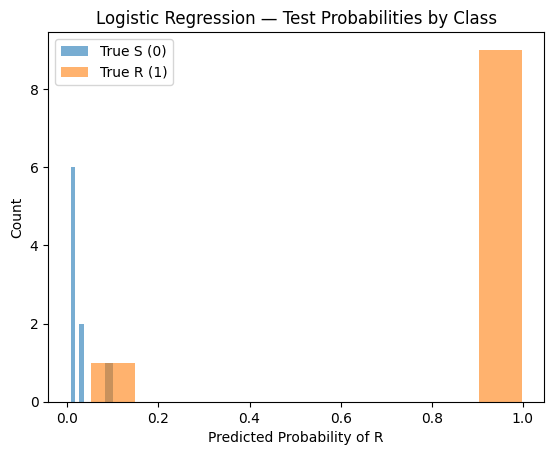

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt

# Fit best model on training data
best_logreg.fit(X_train, y_train)

# Predict on test set
proba_test = best_logreg.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

print("=== Logistic Regression — Test Performance ===")
print(classification_report(y_test, pred_test, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Test):", roc_auc_score(y_test, proba_test))
print("Average Precision (Test):", average_precision_score(y_test, proba_test))

# Compare prediction probability distributions by true class (test set)
plt.figure()
plt.hist(proba_test[y_test == 0], bins=10, alpha=0.6, label='True S (0)')
plt.hist(proba_test[y_test == 1], bins=10, alpha=0.6, label='True R (1)')
plt.xlabel("Predicted Probability of R")
plt.ylabel("Count")
plt.title("Logistic Regression — Test Probabilities by Class")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define the model
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)



In [ ]:
# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Cross-validation strategy for tuning
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=cv_strategy,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit
random_search.fit(X_encoded, y_encoded)

print("Best Params:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Params: {'penalty': 'l1', 'C': 10}
Best CV Accuracy: 0.8988888888888888
